# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [10]:
candidateno=277161 #this MUST be updated to your candidate number so that you get a unique data sample


In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tyrakoranteng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tyrakoranteng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/tyrakoranteng/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [7]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [11]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['bob', 'the', 'happy', 'bastard', "'", 's', 'quickie', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [12]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string


 # Convert each word to lowercase and remove punctuation
def preprocess_words(words):
    
    remove_punctuation = [word.lower() for word in words if word.isalpha()]
    
# Filter out stop words from the list of words    
    stop_words = set(stopwords.words('english'))
    content_words = [word for word in remove_punctuation if word not in stop_words]
    
    return content_words

# Create an empty list to store positive words
positive_words = []

# Iterate through training data, extract positive words, and preprocess them
for words, label in training_data:
    if label == 'pos':
        positive_words.extend(preprocess_words(words))

# Create a frequency distribution of positive words
positive_freq_dist = FreqDist(positive_words)


positive_content_words = [word for word, _ in positive_freq_dist.most_common(10)]

print("10 Representative Content Words in Positive Reviews:")
print(positive_content_words)



10 Representative Content Words in Positive Reviews:
['film', 'one', 'movie', 'like', 'good', 'story', 'also', 'time', 'even', 'well']


In [13]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string


 # Convert each word to lowercase and remove punctuation
def preprocess_words(words):
    
    remove_punctuation = [word.lower() for word in words if word.isalpha()]
    
# Filter out stop words from the list of words                
    stop_words = set(stopwords.words('english'))
    content_words = [word for word in remove_punctuation if word not in stop_words]
    
    return content_words

# Create an empty list to store negative words
negative_words = []

# Iterate through training data, extract negative words, and preprocess them
for words, label in training_data:
    if label == 'neg':
        negative_words.extend(preprocess_words(words))

# Create a frequency distribution of negative words
negative_freq_dist = FreqDist(negative_words)


negative_content_words = [word for word, _ in negative_freq_dist.most_common(10)]

print("10 Representative Content Words in Negative Reviews:")
print(negative_content_words)




10 Representative Content Words in Negative Reviews:
['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'get', 'would', 'much']


This code extracts words from positive/negative reviews while preprocessing them, removing punctuation, converting to lowercase, and filtering out stopwords. This allows us to focus on words that are likely to represent the content of positive reviews without noise from punctuation and common words.

We iterate through the training_data dataset, which contains pairs of words and labels.
We check the label of each data point to filter for positive and negative reviews i.e. label == 'pos' & label == 'neg' respectively.
For each positive/negative review, we extend the positive/negative words list with the preprocessed and cleaned words.




2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [14]:
# Representative words for positive and negative reviews
positive_words = ['film', 'one', 'movie', 'like', 'good', 'story', 'also', 'time', 'even', 'well']
negative_words = ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'get', 'would', 'much']

# Function to classify a review as positive or negative
def classify_review(review, positive_words, negative_words):
    positive_count = sum(1 for word in review if word in positive_words)
    negative_count = sum(1 for word in review if word in negative_words)
    
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    

# Example reviews
review1 = ['good', 'movie', 'enjoyed', 'story']
review2 = ['boring', 'time', 'poor', 'plot']


# Classify example reviews
result1 = classify_review(review1, positive_words, negative_words)
result2 = classify_review(review2, positive_words, negative_words)



print("Review 1: Classified as", result1)
print("Review 2: Classified as", result2)



Review 1: Classified as positive
Review 2: Classified as None


In [15]:
from nltk.classify.api import ClassifierI
from nltk import FreqDist

class SimpleClassifier(ClassifierI): 
    def __init__(self, pos, neg): 
        # Initialize the SimpleClassifier with positive and negative word lists
        self._pos = set(pos) 
        self._neg = set(neg)

    def classify(self, words): 
         # Calculate a score based on the presence of words in positive and negative lists
        score = sum(1 if word in self._pos else -1 if word in self._neg else 0 for word in words)
        
        # Classify the review as "pos" if the score is positive, otherwise "neg"
        return "pos" if score > 0 else "neg"

    def labels(self): 
         # Return the labels used by the classifier ("pos" and "neg")
        return ("pos", "neg")

# Example usage
positive_words = ['film', 'one', 'movie', 'like', 'good', 'story', 'also', 'time', 'even', 'well']
negative_words = ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'get', 'would', 'much']

# Create an instance of the SimpleClassifier
classifier = SimpleClassifier(positive_words, negative_words)

# Example classification
review_text = "This movie was great"
words_in_review = review_text.lower().split()  # assuming you want case-insensitive matching
classification = classifier.classify(words_in_review)
print(f"The review is classified as: {classification}")


The review is classified as: pos


This code defines a simple sentiment classifier, `SimpleClassifier`, as a subclass of the NLTK `ClassifierI`. It is initialized with two sets of words, one representing positive sentiments (`_pos`) and the other negative sentiments (`_neg`). 

The `classify` method takes a list of words as input, assigns a score based on the presence of words in the positive and negative sets, and classifies the input as "pos" if the score is positive and "neg" otherwise. 

The `labels` method returns the possible classification labels used by the classifier, which are "pos" and "neg." 

This classifier operates on the basic principle of counting positive and negative words in a given text to determine its sentiment.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [16]:
def classifier_evaluate(cls, testing_data):
    acc = 0
    docs, gold_standard = zip(*testing_data)

    # Pass all of the docs to the classifier and get back a list of predictions
    predictions = cls.classify_many(docs)

    # Zip the predictions with the gold standard labels and compare
    for prediction, gold_label in zip(predictions, gold_standard):
        if prediction == gold_label:
            acc += 1

    return acc / len(testing_data)

#Calculate accuracy
accuracy = classifier_evaluate(classifier, testing_data)
print(f"Classifier Accuracy: {accuracy:.2%}")


Classifier Accuracy: 49.83%


In [17]:
class ConfusionMatrix:
    def __init__(self, predictions, gold_standard, classes=("pos", "neg")):
        
        # Initialize the ConfusionMatrix object with predicted and actual labels
        (self.c1, self.c2) = classes
        
        self.TP = 0 # True Positives (correctly predicted positive instances)
        self.FP = 0 # False Positives (incorrectly predicted positive instances)
        self.FN = 0 # False Negatives (incorrectly predicted negative instances)
        self.TN = 0 # True Negatives (correctly predicted negative instances)

        for p, g in zip(predictions, gold_standard):
            if g == self.c1:
                if p == self.c1:
                    self.TP += 1
                else:
                    self.FN += 1
            elif p == self.c1:
                self.FP += 1
            else:
                self.TN += 1

    def precision(self):
        # Precision is the ratio of correctly predicted positive observations to the total predicted positives
        return self.TP / (self.TP + self.FP) if (self.TP + self.FP) != 0 else 0

    def recall(self):
        # Recall is the ratio of correctly predicted positive observations to all the actual positives
        return self.TP / (self.TP + self.FN) if (self.TP + self.FN) != 0 else 0

    def f1(self):
        # F1 Score is the weighted average of Precision and Recall
        precision = self.precision()
        recall = self.recall()
        return (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    

docs, gold_standard = zip(*testing_data)

# Pass all of the docs to the classifier and get back a list of predictions
predictions = classifier.classify_many(docs)

# Create a ConfusionMatrix instance
conf_matrix = ConfusionMatrix(predictions, gold_standard)

# Calculate precision, recall, and F1 score
precision = conf_matrix.precision()
recall = conf_matrix.recall()
f1_score = conf_matrix.f1()

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1_score:.2%}")


Precision: 49.92%
Recall: 99.33%
F1 Score: 66.44%


In [18]:
def calculate_class_distribution(data):
    class_counts = {}
    
    for _, label in data:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    return class_counts


training_class_distribution = calculate_class_distribution(training_data)
testing_class_distribution = calculate_class_distribution(testing_data)

print("Class Distribution in Training Data:")
print(training_class_distribution)

print("\nClass Distribution in Testing Data:")
print(testing_class_distribution)


Class Distribution in Training Data:
{'pos': 700, 'neg': 700}

Class Distribution in Testing Data:
{'pos': 300, 'neg': 300}


Given the provided class distributions, where both the training and testing datasets have approximately equal representation of positive ('pos') and negative ('neg') instances, it is reasonable to evaluate the classifier in terms of accuracy. The balanced nature of the datasets allows accuracy to provide a meaningful overall assessment of the classifier's performance, as it considers both classes equally.

In this case, accuracy would give a fair representation of how well the classifier is performing across both positive and negative instances. The classifier's ability to correctly classify instances from both classes would be reflected accurately in the accuracy metric.

Counterexample where Accuracy might not be Reasonable:
If the class distribution were heavily imbalanced, with a significant majority of instances belonging to one class, accuracy might not be a suitable metric. For instance, if 90% of instances were labeled as 'pos' and only 10% as 'neg', a classifier that predicts 'pos' for all instances could achieve a high accuracy (90%). However, such a model would not be useful, especially if the goal is to correctly identify instances of the minority class ('neg'). In imbalanced scenarios, precision, recall, and F1 score become more informative metrics for evaluating classifier performance, as they provide insights into how well the model handles the minority class.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [19]:
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy



# Feature extraction
def extract_features(words):
    return dict([(word, True) for word in words])

# Prepare training and testing sets
training_set = [(extract_features(words), label) for words, label in training_data]
testing_set = [(extract_features(words), label) for words, label in testing_data]

# Train the Naive Bayes classifier
nb_classifier = NaiveBayesClassifier.train(training_set)

# Evaluate the performance
accuracy_nb = accuracy(nb_classifier, testing_set)

print(f"Naive Bayes Classifier Accuracy: {accuracy_nb:.2%}")




Naive Bayes Classifier Accuracy: 63.83%


The results indicate that the Naive Bayes classifier outperforms the word list classifier in terms of accuracy, achieving 63.83% accuracy compared to the word list classifier's accuracy of 49.83%. The Naive Bayes classifier, which leverages probabilistic modeling based on word features, demonstrates better overall predictive performance on the testing data.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


a. Experiment Design

Objective: To investigate the impact of the length of word lists on the performance of the word list classifier.

Variable: The independent variable is the length of the word lists used by the classifier. This variable will be manipulated to observe its impact on classifier performance (dependent variable).

Classifier: Use the word list classifier (SimpleClassifier) with different word list lengths.

Datasets: Utilize the training and testing datasets provided.

Experiment Steps:

1. Create word lists of varying lengths, ranging from a small number of representative words to more extensive lists (10 - 1000).

2. Train the word list classifier with each set of word lists.

3. Evaluate, record and analyze the classifier's accuracy on the testing dataset for each word list length.

4. Interpret the plotted graph: Observe how accuracy changes with the length of the wordlist. Look for patterns or trends.

The accuracy of Word List Classifier (Size 10) is 0.49666666666666665
The accuracy of Word List Classifier (Size 20) is 0.5466666666666666
The accuracy of Word List Classifier (Size 50) is 0.5016666666666667
The accuracy of Word List Classifier (Size 100) is 0.5
The accuracy of Word List Classifier (Size 150) is 0.5
The accuracy of Word List Classifier (Size 200) is 0.5
The accuracy of Word List Classifier (Size 500) is 0.5
The accuracy of Word List Classifier (Size 1000) is 0.5


,Word List Size,Accuracy
0,10,0.496667
1,20,0.546667
2,50,0.501667
3,100,0.500000
4,150,0.500000
5,200,0.500000
6,500,0.500000
7,1000,0.500000


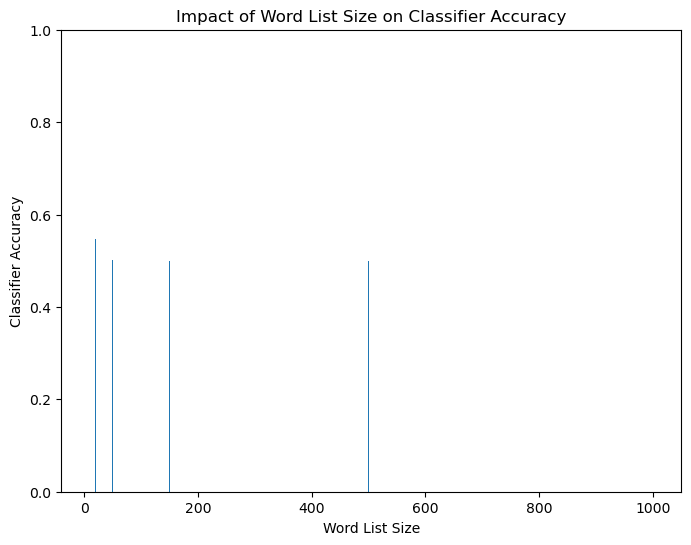

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Experiment parameters
word_list_sizes = [10, 20, 50, 100, 150, 200, 500, 1000]
results = []

# Get the training and testing data
training_data, testing_data = get_train_test_data()

# Perform the experiment for different word list sizes
for size in word_list_sizes:
    # Convert StreamBackedCorpusView to list before sampling
    positive_words = random.sample(list(movie_reviews.words(categories='pos')), size)
    negative_words = random.sample(list(movie_reviews.words(categories='neg')), size)

    classifier = SimpleClassifier(positive_words[:size], negative_words[:size])
    accuracy = classifier_evaluate(classifier, testing_data)


    print("The accuracy of Word List Classifier (Size {}) is {}".format(size, accuracy))
    results.append((size, accuracy))

# Create a DataFrame and plot the results
df = pd.DataFrame(results, columns=['Word List Size', 'Accuracy'])
display(df)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(df['Word List Size'], df['Accuracy'])
plt.title("Impact of Word List Size on Classifier Accuracy")
plt.xlabel("Word List Size")
plt.ylabel("Classifier Accuracy")
plt.ylim(0, 1.0)
plt.show()


Experiment Conclusions: 

Initially, as the size of the word list increases from 10 to 20, there is a noticeable improvement in accuracy. However, beyond size 20, the accuracy remains relatively stable, hovering around 0.5. This suggests that the classifier's performance plateaus, indicating that the classifier is performing no better than random chance, and adding more words beyond a certain threshold doesn't significantly enhance its accuracy. 

It is important to note that accuracy alone may not provide a comprehensive evaluation, and future considerations should involve exploring additional performance metrics such as precision, recall, and F1 score. These metrics can provide a more nuanced understanding of the classifier's strengths and weaknesses, particularly in handling false positives and false negatives. 

Additionally, investigating the impact of different feature extraction methods or incorporating more sophisticated classifiers could contribute to refining the model further.

b. For future work in the area of sentiment analysis, a Naive Bayes classifier is recommended over a wordlist classifier. While wordlist classifiers are simple and intuitive, they often lack the ability to capture the nuanced relationships and context-dependent nature of language. 

Naive Bayes classifiers, on the other hand, can leverage statistical patterns in the data and consider the joint probabilities of words, making them more adaptable to varying linguistic structures. They can handle a larger feature space and are better equipped to generalize from the training data to make predictions on unseen examples. 

Additionally, Naive Bayes classifiers inherently account for the likelihood of word co-occurrences, providing a more sophisticated approach to sentiment analysis that can yield improved accuracy and generalization in the classification of positive and negative sentiments.

In [43]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current


filepath="/Users/tyrakoranteng/Downloads/ANLP Assignment (1).ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 862
